<a href="https://colab.research.google.com/github/yunusemrektk/FPGA/blob/master/Short%20Term%20Prediction-LSTM/Short_Term_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
#Get the stock quote
df = web.DataReader('AAPL',data_source ='yahoo',start = '2015-01-01',end = '2019-01-01')
df.head
df.shape

(1006, 6)

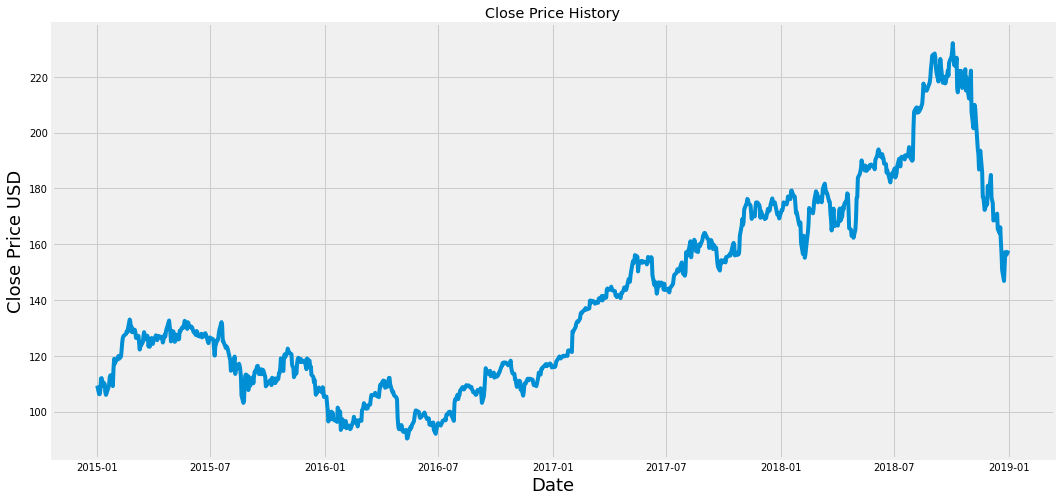

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,99.945885
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,97.130241
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,97.139420
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,98.501518
2015-01-08,112.150002,108.699997,109.230003,111.889999,59364500.0,102.286186
...,...,...,...,...,...,...
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,143.924454
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,154.059814
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,153.059998


In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD' ,fontsize=18)
plt.show()
df

In [ ]:
#Create a new data frame with only the Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len


805

In [ ]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.13398719],
       [0.11225571],
       [0.11232629],
       ...,
       [0.46433354],
       [0.46489801],
       [0.47555213]])

In [ ]:
train_data = scaled_data
x_train = []
y_train =[]


In [ ]:
#Set x and y train
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])


In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train , y_train = np.array(x_train),np.array(y_train)
#Reshape
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(946, 60, 1)

In [ ]:
#Build the LSTM model
model= Sequential() #1. Hidden Layer should be between input layer number and output layer number, 2.Hidden layer number should be 2/3 times input layer 
model.add(LSTM(60,return_sequences=True,input_shape=(x_train.shape[1],1))) # Input Layer (60)
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=False)) # 1.Hidden Layer
model.add(Dropout(0.2))

model.add(Dense(40))  #2.Hidden Layer
model.add(Dense(1))   #Output Layer

In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Train the model
history = model.fit(x_train,y_train,batch_size=32,epochs=1000)

Epoch 1/1000
30/30 [==============================] - 2s 56ms/step - loss: 0.0306
Epoch 2/1000
30/30 [==============================] - 2s 56ms/step - loss: 0.0045
Epoch 3/1000
30/30 [==============================] - 2s 57ms/step - loss: 0.0036
Epoch 4/1000
30/30 [==============================] - 2s 56ms/step - loss: 0.0032
Epoch 5/1000
30/30 [==============================] - 2s 56ms/step - loss: 0.0032
Epoch 6/1000
30/30 [==============================] - 2s 56ms/step - loss: 0.0023
Epoch 7/1000
30/30 [==============================] - 2s 58ms/step - loss: 0.0022
Epoch 8/1000
30/30 [==============================] - 2s 58ms/step - loss: 0.0025
Epoch 9/1000
30/30 [==============================] - 2s 57ms/step - loss: 0.0022
Epoch 10/1000
30/30 [==============================] - 2s 57ms/step - loss: 0.0019
Epoch 11/1000
30/30 [==============================] - 2s 57ms/step - loss: 0.0021
Epoch 12/1000
30/30 [==============================] - 2s 56ms/step - loss: 0.0016
Epoch 13/1000

[0.030561644583940506, 0.004502833820879459, 0.003571138484403491, 0.003214799100533128, 0.0031654478516429663, 0.0023036422207951546, 0.002181080635637045, 0.002511505503207445, 0.002206953940913081, 0.0018879222916439176, 0.0021193400025367737, 0.001636658445931971, 0.0016702235443517566, 0.0019925443921238184, 0.001998881809413433, 0.0017284405184909701, 0.0018340346869081259, 0.001488577458076179, 0.0014924714341759682, 0.0013836045982316136, 0.0014926961157470942, 0.0014994959346950054, 0.0014468119479715824, 0.0015089161461219192, 0.001292860833927989, 0.0014393404126167297, 0.0013512998120859265, 0.0015689433785155416, 0.0013127144193276763, 0.00120961491484195, 0.0011615692637860775, 0.0013211253099143505, 0.0012489698128774762, 0.0011948909377679229, 0.001279733027331531, 0.001252653426490724, 0.0012422322761267424, 0.0012063871836289763, 0.0012828756589442492, 0.001187858055345714, 0.0012183228973299265, 0.0010581102687865496, 0.0011442797258496284, 0.0009755933424457908, 0.0

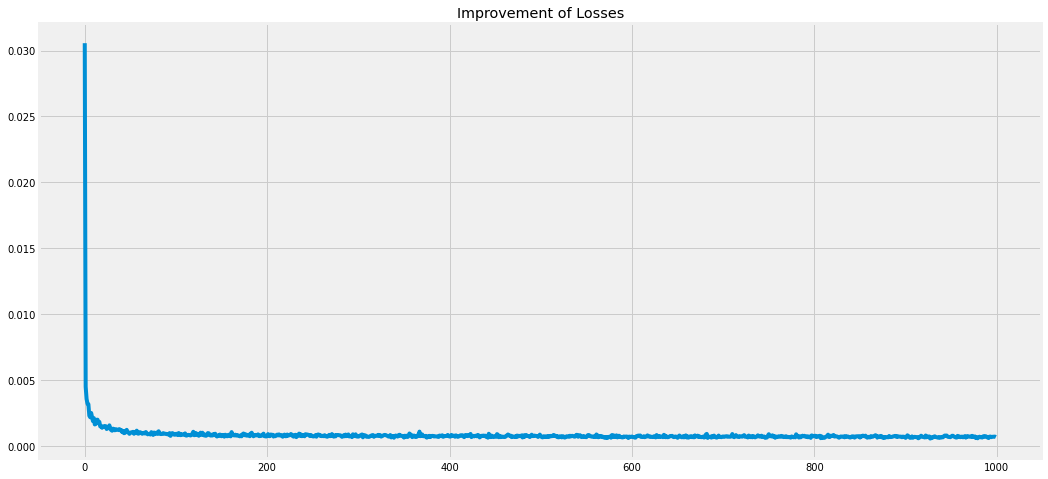

In [ ]:
#Plotting the losses of each epoch

print(history.history['loss'])
loss_history = history.history['loss']

plt.figure(figsize=(16,8))
plt.title("Improvement of Losses")
plt.plot(loss_history)

In [ ]:
#Create the testing data set
test_data = scaled_data
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[60:len(test_data)]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
len(x_test)  

946

In [ ]:
#Convert the data to a numpy array -LSTM Models want 3D shape
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0] , x_test.shape[1] , 1 ))

In [ ]:
#Get the models predicted price values (x_test)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # Unscale the values

In [ ]:
print(predictions[0],y_test[0])

[126.47952] [124.43000031]


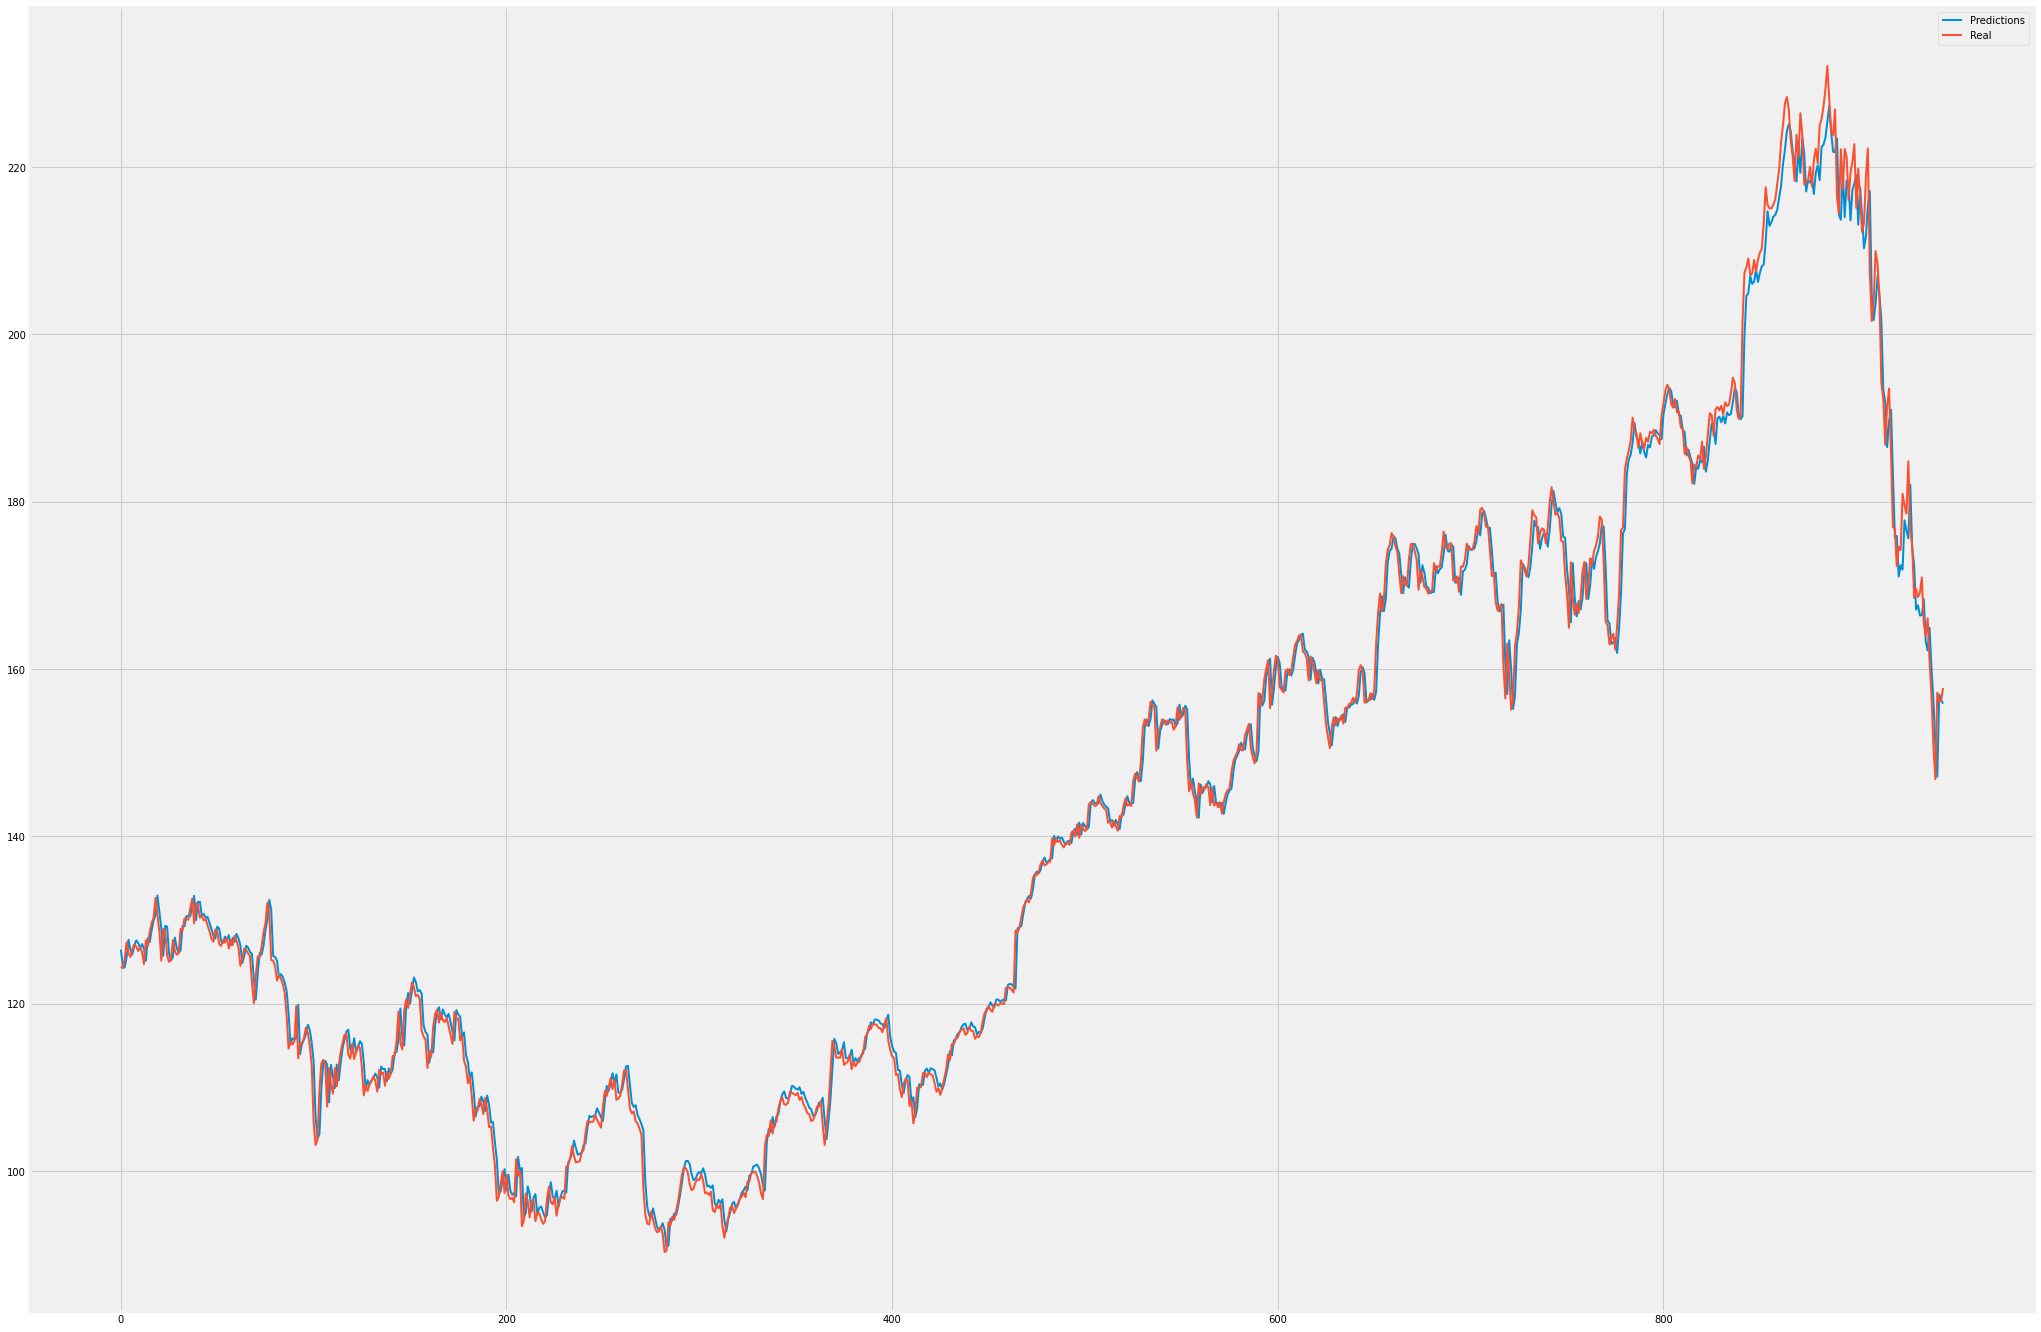

In [ ]:
#Predicted Data
plt.figure(figsize=(32,24))
plt.plot(predictions,linewidth=2)
plt.plot(y_test,linewidth =2)
plt.legend(['Predictions','Real'])
plt.show()

In [ ]:
open_prices = df.filter(['Open'])
open_prices = open_prices[60:]
len(open_prices)

open_prices = np.array(open_prices)


In [ ]:
#Compare the open prices with Close price.

#Total counts
count_fall=0
count_rise=0
rising=[]
falling=[]
diff_th =0.5
for i in range (0,len(y_test)):
  if (open_prices[i]-y_test[i])>diff_th:
    falling.append(i)

for i in range(0,len(y_test)):
  if (open_prices[i]-y_test[i])<-diff_th:
    rising.append(i)
#Copmparing the prices between predicted close price and next days open prices

rising_pred =[]
falling_pred=[]
point_rise=[]
point_fall=[]

diff = 0

for i in falling:
  if (open_prices[i]-predictions[i])>diff:
    count_fall=count_fall+1
    point_fall.append(i) 
 
for i in rising:
 if (open_prices[i]-predictions[i])<diff:
    count_rise=count_rise+1
    point_rise.append(i)

percent_fall = count_fall/len(falling)*100
percent_rise = count_rise/len(rising)*100   
print("The accuracy of falling prediction is %",percent_fall)    
print("The accuracy of rising prediction is %",percent_rise)

The accuracy of falling prediction is % 47.26027397260274
The accuracy of rising prediction is % 53.3724340175953


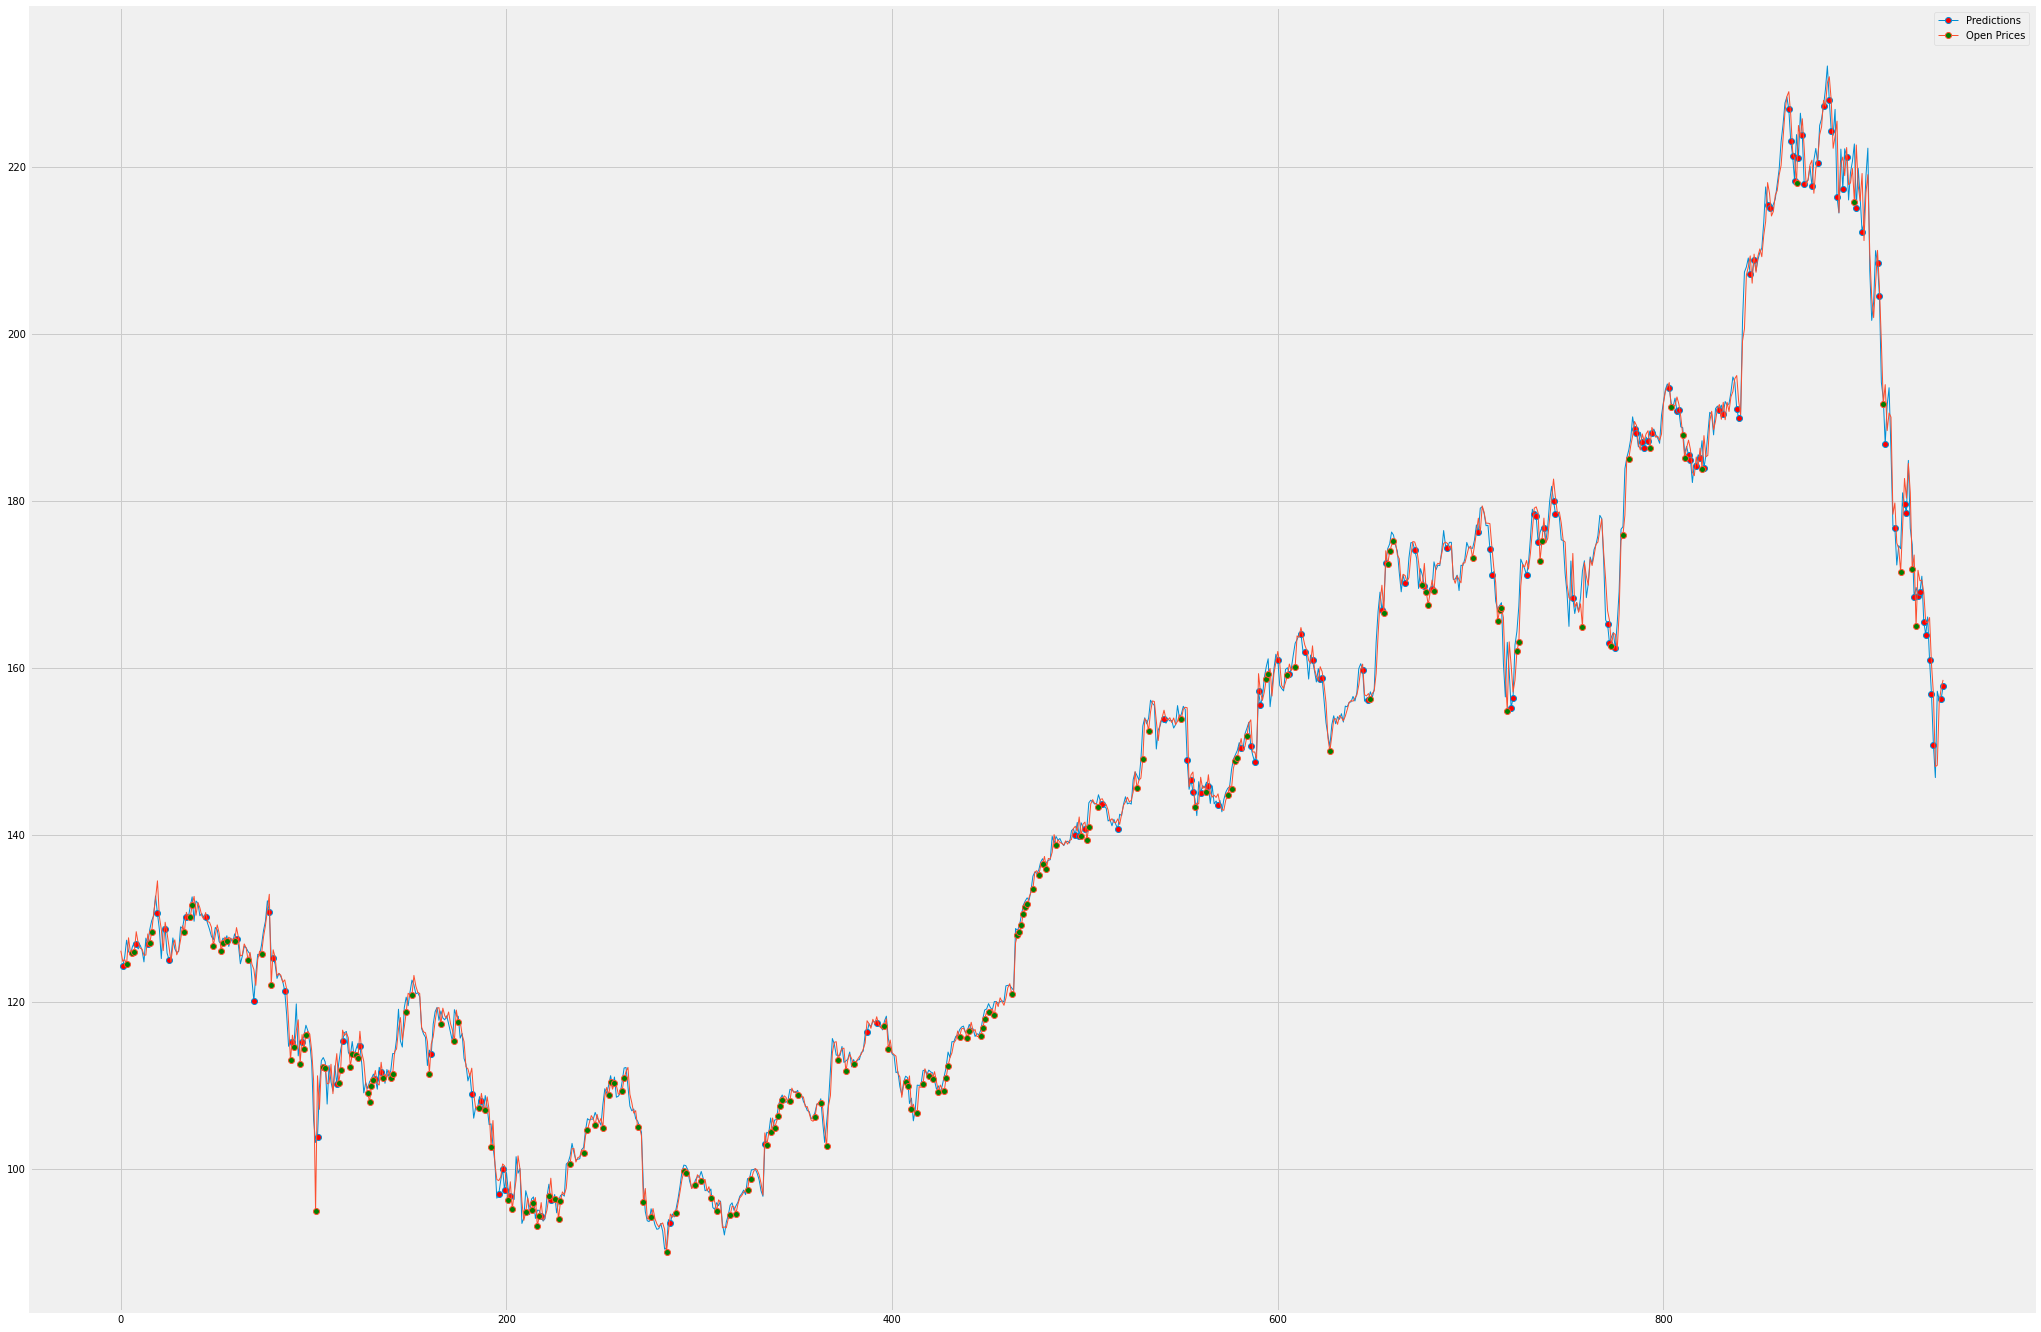

In [ ]:
plt.figure(figsize=(32,24))
plt.plot(y_test,linewidth=1,marker='o',markevery=point_fall,markerfacecolor='Red')
plt.plot(open_prices,linewidth=1,marker='o',markevery=point_rise,markerfacecolor='Green')
#plt.scatter(rising,rising_pred,color='green')
#plt.scatter(falling,falling_pred,color='red')
plt.legend(['Predictions','Open Prices','Rising','Falling'])


[2, 9, 12, 15, 24, 26, 32, 35, 37, 39, 49, 52, 53, 58, 61, 65, 67, 70, 71, 72, 74, 82, 83, 87, 90, 93, 96, 98, 99]


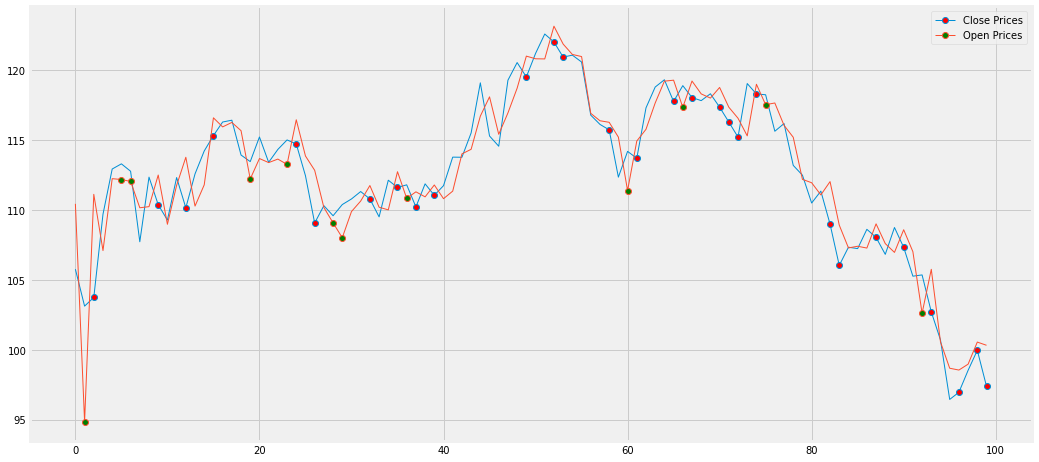

In [ ]:
#Testing the Accuracy 
zoom_ytest = y_test[100:200]
zoom_open = open_prices[100:200]
zoom_mark_f = [2, 9, 12, 15, 24, 26, 32, 35, 37, 39, 49, 52, 53, 58, 61, 65, 67, 70, 71, 72, 74, 82, 83, 87, 90, 93, 96, 98, 99]
zoom_mark_r = [1,5,6,19,23,28,29,36,60,66,75,92]
print(zoom_mark_f)

plt.figure(figsize=(16,8))
plt.plot(zoom_ytest,linewidth=1,marker='o',markevery=zoom_mark_f,markerfacecolor='Red')
plt.plot(zoom_open,linewidth=1,marker='o',markevery=zoom_mark_r,markerfacecolor='Green')
plt.legend(['Close Prices','Open Prices','Rising','Falling'])